In [3]:
#Bibliotecas necessárias
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

In [29]:
#Dados
alturas_alunos = [162,172,170,165,169,179,164,174,186,178,179,176,174,172,171,185,150,166,179,173,168,177,180,167,178,180,180,300]
distrito_alunos = ["Lisboa","Porto","Porto","São Paulo", "Faro","Aveiro","Porto","Aveiro","Madeira","Funchal","Porto","Porto","Porto","Porto",
                   "Porto","Porto","Porto","Porto","Porto","Viseu","Aveiro","Aveiro","Viana de Castelo","Porto","Aveiro","Cabo Verde","Cabo Verde","China"]
validade_cc_alunos = [2022,2025,2023,2022,2025,2026,2024,2026,2025,2024,2024,2033,2024,2030,2025,2023,2021,2022,2024,2022,2024,2025,2024,2026,2025,2023,2026,2000]

#declarar pandas dataframe
df_estrutura = {'alturas': alturas_alunos, 'distrito': distrito_alunos, 'validade_cc': validade_cc_alunos}
df = pd.DataFrame(data=df_estrutura)

In [9]:
#Visualizar dados
df

alturas          distrito  validade_cc
0       162            Lisboa         2022
1       172             Porto         2025
2       170             Porto         2023
3       165         São Paulo         2022
4       169              Faro         2025
5       179            Aveiro         2026
6       164             Porto         2024
7       174            Aveiro         2026
8       186           Madeira         2025
9       178           Funchal         2024
10      179             Porto         2024
11      176             Porto         2033
12      174             Porto         2024
13      172             Porto         2030
14      171             Porto         2025
15      185             Porto         2023
16      150             Porto         2021
17      166             Porto         2022
18      179             Porto         2024
19      173             Viseu         2022
20      168            Aveiro         2024
21      177            Aveiro         2025
22      180  Viana de Castelo         2024
23      167             Porto         2026
24      178            Aveiro         2025
25      180        Cabo Verde         2023
26      180        Cabo Verde         2026

In [10]:
#Frequência absoluta
df.groupby('distrito').count()

alturas  validade_cc
distrito                              
Aveiro                  5            5
Cabo Verde              2            2
Faro                    1            1
Funchal                 1            1
Lisboa                  1            1
Madeira                 1            1
Porto                  13           13
São Paulo               1            1
Viana de Castelo        1            1
Viseu                   1            1

In [11]:
#Frequência relativa
df.groupby('distrito').count()/len(df)

alturas  validade_cc
distrito                               
Aveiro            0.185185     0.185185
Cabo Verde        0.074074     0.074074
Faro              0.037037     0.037037
Funchal           0.037037     0.037037
Lisboa            0.037037     0.037037
Madeira           0.037037     0.037037
Porto             0.481481     0.481481
São Paulo         0.037037     0.037037
Viana de Castelo  0.037037     0.037037
Viseu             0.037037     0.037037

In [12]:
#Frequência acumulada
df.groupby('distrito').count().cumsum()

alturas  validade_cc
distrito                              
Aveiro                  5            5
Cabo Verde              7            7
Faro                    8            8
Funchal                 9            9
Lisboa                 10           10
Madeira                11           11
Porto                  24           24
São Paulo              25           25
Viana de Castelo       26           26
Viseu                  27           27

In [13]:
#Frequência relativa acumulada
df.groupby('distrito').count().cumsum()/len(df)

alturas  validade_cc
distrito                               
Aveiro            0.185185     0.185185
Cabo Verde        0.259259     0.259259
Faro              0.296296     0.296296
Funchal           0.333333     0.333333
Lisboa            0.370370     0.370370
Madeira           0.407407     0.407407
Porto             0.888889     0.888889
São Paulo         0.925926     0.925926
Viana de Castelo  0.962963     0.962963
Viseu             1.000000     1.000000

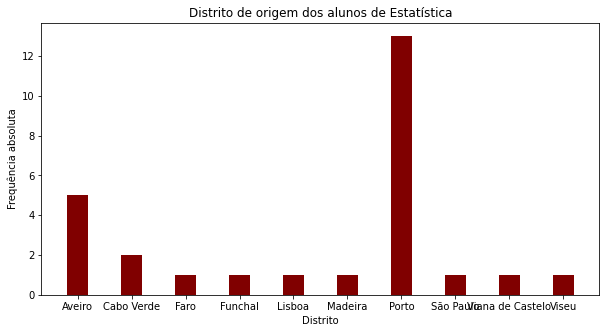

In [14]:
#Gráfico de barras
fig = plt.figure(figsize = (10, 5))

#definição do gráfico
plt.bar(list(df.groupby('distrito').groups.keys()), list(df.groupby('distrito').count()['alturas']), color ='maroon', width = 0.4)

#definição dos eixos
plt.xlabel("Distrito")
plt.ylabel("Frequência absoluta")
plt.title("Distrito de origem dos alunos de Estatística")
plt.show()

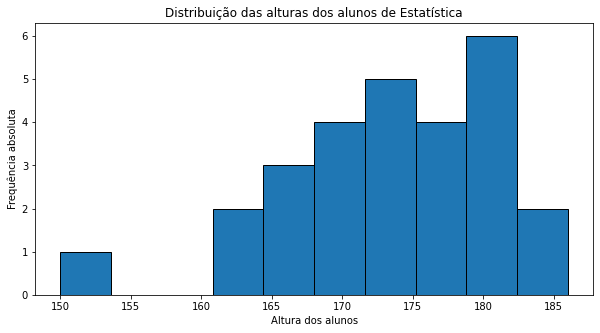

In [22]:
#Exemplo de histograma
fig = plt.figure(figsize = (10, 5))
plt.hist(df['alturas'], bins=10, edgecolor='black')
plt.xlabel("Altura dos alunos")
plt.ylabel("Frequência absoluta")
plt.title("Distribuição das alturas dos alunos de Estatística")
plt.show()

In [23]:
#Com o fator de sturges
fator_sturges = math.log(len(df),2)+1
numero_intervalos = (max(df['alturas'])-min(df['alturas']))/fator_sturges
numero_intervalos

6.255552343371839

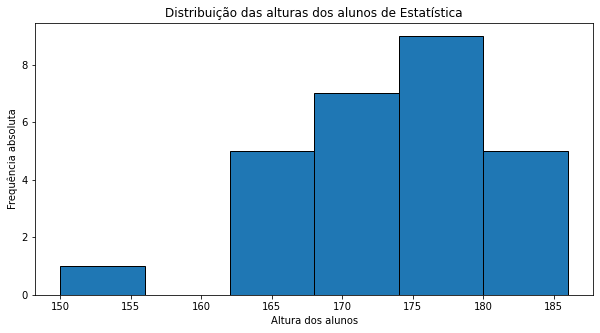

In [24]:
fig = plt.figure(figsize = (10, 5))
plt.hist(df['alturas'], bins=int(numero_intervalos), edgecolor='black')
plt.xlabel("Altura dos alunos")
plt.ylabel("Frequência absoluta")
plt.title("Distribuição das alturas dos alunos de Estatística")
plt.show()

In [25]:
#Medidas de localização e dispersão
df.describe()

alturas  validade_cc
count   27.000000    27.000000
mean   173.111111  2024.555556
std      7.797107     2.470337
min    150.000000  2021.000000
25%    168.500000  2023.000000
50%    174.000000  2024.000000
75%    179.000000  2025.000000
max    186.000000  2033.000000

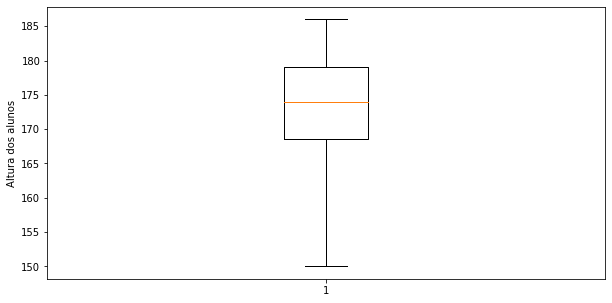

In [26]:
# Boxplot
fig = plt.figure(figsize = (10, 5))
plt.ylabel("Altura dos alunos")
plt.boxplot(df['alturas'], whis=max(df['alturas'])) #a opção whis é que controla o interquartile range do matplotlib
plt.show()

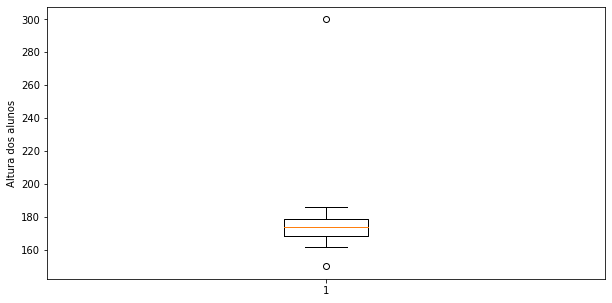

In [30]:
# Diagrama Caixa-de-Bigodes
fig = plt.figure(figsize = (10, 5))
plt.ylabel("Altura dos alunos")
plt.boxplot(df['alturas'])
plt.show()

In [58]:
#why a média do (x-x_barra)^2?
diferenca_alturas_para_a_media = [x - np.mean(df['alturas']) for x in df['alturas']]
sum(diferenca_alturas_para_a_media)

0.0

In [59]:
#Coeficiente de variação
np.std(df['alturas'])/np.mean(df['alturas'])

0.054664135883345455

In [60]:
np.std(df['validade_cc'])/np.mean(df['validade_cc'])

0.005537621799864535